In [5]:
import spacy
import pandas as pd
import matplotlib.pyplot as plt
from zipfile import ZipFile
import os
from io import StringIO
#import nltk
#from nltk.tokenize import word_tokenize
#from nltk.tag import pos_tag
import re

In [117]:
def preprocess(sent):
    sent = nltk.word_tokenize(sent)
    sent = nltk.pos_tag(sent)
    return sent

In [118]:
nlp = spacy.load("fr_core_news_md", disable=['parser', 'tagger', 'ner'])
fichier=open('stopwords-fr.txt','r')
stops=set()
for word in fichier:
    mot=re.sub('\n','',word)
    stops.add(mot)

def normalize(comment, lowercase, remove_stopwords):
    if lowercase:
        comment = comment.lower()
    comment = nlp(comment)
    lemmatized = list()
    for word in comment:
        lemma = word.lemma_.strip()
        if lemma:
            if not remove_stopwords or (remove_stopwords and lemma not in stops):
                lemmatized.append(lemma)
    return " ".join(lemmatized)

In [119]:
lettre=pd.read_json("json/QANR5L15QE1.json")


In [120]:
texte=lettre['question']['textesQuestion']['texteQuestion']['texte']

In [121]:
normaliser=normalize(texte,True,stops)

In [122]:
ministere=list()
contenu_normalized=list()
date=list()
parti=list()
theme=list()
for element in os.listdir('json'):
    if element.endswith('.json'):
        fichier=pd.read_json('json/'+str(element))
        theme.append(fichier['question']['indexationAN']['rubrique'])
        texte=fichier['question']['textesQuestion']['texteQuestion']['texte']
        contenu_normalized.append(normalize(texte,True,stops))
        date.append(fichier['question']['textesQuestion']['texteQuestion']['infoJO']['dateJO'])
        parti.append(fichier['question']['auteur']['groupe']['abrege'])
        ministere.append(fichier['question']['minInt']['abrege'])
        


In [125]:
synthese=pd.DataFrame(theme)

In [128]:
synthese['Parti']=parti

In [129]:
synthese['texte']=contenu_normalized

In [130]:
synthese['Date']=date

In [132]:
synthese=synthese.rename(columns={0: "theme"})

In [134]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [135]:
pd.to_datetime(synthese['Date'][0])

Timestamp('2019-04-23 00:00:00')

In [136]:
synthese['Date']=pd.to_datetime(synthese['Date'])

In [137]:
synthese=synthese.sort_values(by = 'Date') 

In [138]:
import datetime as dt
date_base=pd.to_datetime("2017-01-08")
synthese['Semaine']=((synthese['Date']-date_base).dt.days/7).astype('int32')

In [139]:
synthese['new_index']=range(len(synthese))

In [140]:
synthese=synthese.set_index('new_index')

In [255]:
legume=synthese[synthese.theme=='ministères et secrétariats d\'État']
legume['new_index2']=range(len(legume))
legume=legume.set_index('new_index2')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [317]:
legume

,theme,Parti,texte,Date,Semaine
new_index2,,,,,
0,ministères et secrétariats d'État,LR,m. patrick hetzel interroger m. ministre écono...,2017-09-19,36
1,ministères et secrétariats d'État,FI,mme muriel ressiguier interroger m. ministre a...,2017-09-19,36
2,ministères et secrétariats d'État,GDR,mme marier - george buffet interroger m. minis...,2017-09-26,37
3,ministères et secrétariats d'État,FI,mme mathilde panot interroger m. premier minis...,2018-01-16,53
4,ministères et secrétariats d'État,SOC,m. régir juanico interroger m. ministre europe...,2018-02-10,56
5,ministères et secrétariats d'État,SOC,"m. régir juanico interroger mme garde sceau , ...",2018-02-10,56
6,ministères et secrétariats d'État,SOC,"m. régir juanico interroger m. ministre état ,...",2018-02-10,56
7,ministères et secrétariats d'État,FI,m. loïc prud'homme interroger m. ministre éduc...,2018-02-10,56
8,ministères et secrétariats d'État,FI,m. michel larive attirer attention mme ministr...,2018-02-10,56


In [7]:
l=legume.groupby('Semaine').groups.keys()

NameError: name 'legume' is not defined

In [6]:
week_todocuments=pd.DataFrame(l,columns=['week'])

NameError: name 'l' is not defined

In [1]:
week_todocuments

NameError: name 'week_todocuments' is not defined

In [331]:
corpus_per_week=[]
char=legume['texte'][0]
for i in range(len(legume)-1):
    if legume['Semaine'][i+1]==legume['Semaine'][i]:
        char+=legume['texte'][i+1]
    else :
        corpus_per_week.append(char)
        char=""
        char+=legume['texte'][i+1]
corpus_per_week.append(char)
    

In [334]:
vectorizer = TfidfVectorizer()
response=vectorizer.fit_transform(corpus_per_week)

In [343]:
dico={}
feature_names = vectorizer.get_feature_names()
dense = response.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns=feature_names)

In [381]:
iden=week_todocuments[week_todocuments['week']==143].index

In [403]:
print(df.idxmax(axis=1))
print(df.max(axis=1))

0         douanier
1        municipal
2          cabinet
3            sport
4          réserve
5      télétravail
6       combattant
7            femme
8     rémunération
9           ancien
10          budget
11          animal
12    rémunération
13          membre
14         dépense
15             pme
16       passeport
17        ministre
18            aude
19           frais
20           frais
21          fusion
22        français
dtype: object
0     0.226629
1     0.332243
2     0.396787
3     0.257550
4     0.430788
5     0.542513
6     0.541973
7     0.385165
8     0.317076
9     0.372095
10    0.385160
11    0.604085
12    0.343477
13    0.329231
14    0.397804
15    0.456191
16    0.491798
17    0.234209
18    0.248565
19    0.350983
20    0.354897
21    0.297418
22    0.375653
dtype: float64


In [414]:
df.idxmax(axis=1).values.tolist()

['douanier',
 'municipal',
 'cabinet',
 'sport',
 'réserve',
 'télétravail',
 'combattant',
 'femme',
 'rémunération',
 'ancien',
 'budget',
 'animal',
 'rémunération',
 'membre',
 'dépense',
 'pme',
 'passeport',
 'ministre',
 'aude',
 'frais',
 'frais',
 'fusion',
 'français']

21

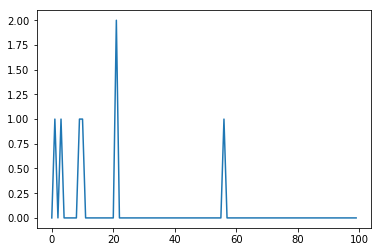

In [260]:
listevide=[]
for i in range(len(corpus_per_week)):
    listevide.append(corpus_per_week[i].count('france'))
plt.plot(listevide)

listevide.index(max(listevide))
